# Exploring US pipeline accidents between 2010-2017

Author: Titania Yan


## Topic: What qualities of crude oil lead to pipeline accidents?

**Questions of interest**:

1. Which chemical and physical properties of US oil pipeline loads are correlated with pipeline accidents, according to data from 2010 to 2016? Since the dataset contains multiple liquid types, I will be considering all of them, and not only crude oil.
2. After exploring the data, which properties should be subject to tighter regulations, and to what capacity?
3. Based on the trends over time, have existing regulations appeared to be effective in reducing pipeline accidents?

**Approach to the questions**:

1. Use data analytics and visualization methods to show how often certain feature values appear in the dataset
2. Use an unsupervised learning method to show how combinations of oil properties play a factor in frequency of pipeline accidents
3. Draw conclusions from the data, and observe trends in changes in properties of interest over time to determine whether regulations have been improving

**Steps (Python)**:

1. Retrieve the **US Oil Pipeline Accidents** dataset from Kaggle, and load it as a Pandas DataFrame
2. Explore the dataset: types of data, number of rows, number and names of columns (features)
3. Remove irrelevant features to the question being asked (i.e. since we are only interested in the physical and chemical properties, we can remove unrelated features)
4. Clean up the relevant dataset by checking for null values, and populate them with reasonable values
5. Plot distributions of distinctive features to show distributions (i.e. bar charts for categorical variables)
6. Use K-modes clustering, with an arbitrary value of K, to find similar groups in the dataset. The K-modes algorithm is used instead of K-means, as the majority of features in this dataset are categorical
7. Group the dataset by year to show the frequency of accidents over time

## Loading and preparing the dataset

In [ ]:
# Package import

import pandas as pd

In [ ]:
# Load the pipeline accident dataset
# Convert the .csv file to a Pandas DataFrame

dataset = pd.read_csv('database.csv')

In [ ]:
# Print the first 5 rows to see what the dataset looks like

dataset.head(5)

,Report Number,Supplemental Number,Accident Year,Accident Date/Time,Operator ID,Operator Name,Pipeline/Facility Name,Pipeline Location,Pipeline Type,Liquid Type,...,Other Fatalities,Public Fatalities,All Fatalities,Property Damage Costs,Lost Commodity Costs,Public/Private Property Damage Costs,Emergency Response Costs,Environmental Remediation Costs,Other Costs,All Costs
0,20100016,17305,2010,1/1/2010 7:15 AM,32109,ONEOK NGL PIPELINE LP,KINDER MORGAN JCT,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",...,NaN,NaN,NaN,110.0,1517.0,0.0,0.0,0.0,0.0,1627
1,20100254,17331,2010,1/4/2010 8:30 AM,15786,PORTLAND PIPELINE CORP,24-INCH MAIN LINE,ONSHORE,ABOVEGROUND,CRUDE OIL,...,NaN,NaN,NaN,4000.0,8.0,0.0,0.0,0.0,0.0,4008
2,20100038,17747,2010,1/5/2010 10:30 AM,20160,"PETROLOGISTICS OLEFINS, LLC",NaN,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",...,NaN,NaN,NaN,0.0,200.0,0.0,0.0,0.0,0.0,200
3,20100260,18574,2010,1/6/2010 7:30 PM,11169,"ENBRIDGE ENERGY, LIMITED PARTNERSHIP",SUPERIOR TERMINAL,ONSHORE,UNDERGROUND,CRUDE OIL,...,NaN,NaN,NaN,200.0,40.0,0.0,11300.0,0.0,0.0,11540
4,20100030,16276,2010,1/7/2010 1:00 PM,300,"PLAINS PIPELINE, L.P.",RED RIVER EAST,ONSHORE,UNDERGROUND,CRUDE OIL,...,NaN,NaN,NaN,20000.0,150.0,0.0,7500.0,2000.0,0.0,29650


In [ ]:
# Print the number of rows in the dataset

len(dataset)

2795

In [ ]:
# Create a new DataFrame and keep only the relevant columns
# Since we are interested in physical and chemical properties of the samples only, we can ignore everything unrelated to those properties
# Keep the column indicating the year of the accident

df = dataset[['Accident Year', 'Liquid Type', 'Liquid Subtype', 'Liquid Name', 'Liquid Ignition', 'Liquid Explosion']]

## Exploring the data: do we see any trends in chemical or physical properties?

Taking a closer look at these features, and their value distributions:
- Liquid Type
- Liquid Subtype
- Liquid Name
- Liquid Ignition
- Liquid Explosion

**Liquid Type**

CRUDE OIL                                               1398
REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LIQUID       939
HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS               418
CO2 (CARBON DIOXIDE)                                      38
BIOFUEL / ALTERNATIVE FUEL(INCLUDING ETHANOL BLENDS)       2
Name: Liquid Type, dtype: int64
Sum of non-null values:  2795


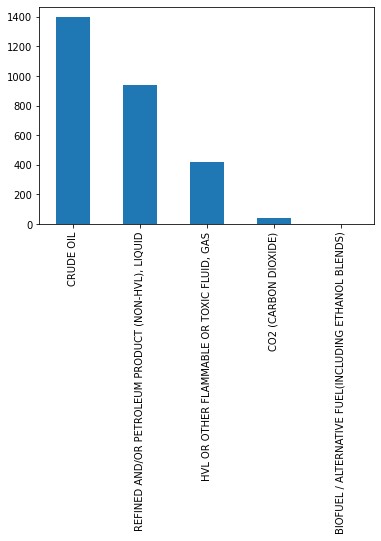

In [ ]:
# Sum liquid type unique values to see how many non-null values exist
# Show distribution of value counts

print(df['Liquid Type'].value_counts())
print('Sum of non-null values: ', str(df['Liquid Type'].value_counts().sum()))
df['Liquid Type'].value_counts().plot.bar();

**Liquid Subtype**

DIESEL, FUEL OIL, KEROSENE, JET FUEL                        408
GASOLINE (NON-ETHANOL)                                      376
LPG (LIQUEFIED PETROLEUM GAS) / NGL (NATURAL GAS LIQUID)    188
OTHER HVL                                                   171
MIXTURE OF REFINED PRODUCTS (TRANSMIX OR OTHER MIXTURE)      98
ANHYDROUS AMMONIA                                            55
OTHER                                                        51
BIODIESEL                                                     2
Name: Liquid Subtype, dtype: int64
Sum of non-null values:  1349


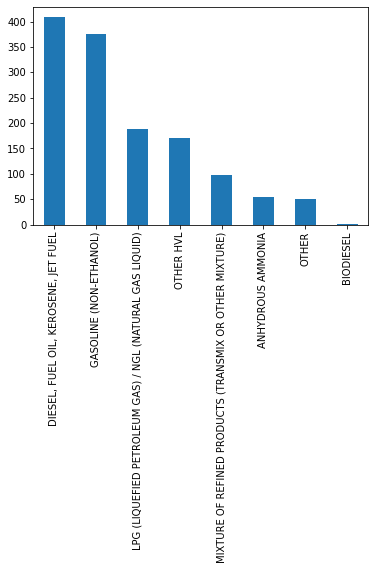

In [ ]:
# Sum liquid subtype unique values to see how many non-null values exist
# Show distribution of value counts

print(df['Liquid Subtype'].value_counts())
print('Sum of non-null values: ', str(df['Liquid Subtype'].value_counts().sum()))
df['Liquid Subtype'].value_counts().plot.bar();

In [ ]:
# Check if most of the null values in this column occur where the liquid type is "crude oil"

df_crude = df[df['Liquid Type']=='CRUDE OIL']
print('Sum of liquid subtype null values when liquid type is crude oil: ', df_crude['Liquid Subtype'].isna().sum())

Sum of liquid subtype null values when liquid type is crude oil:  1398


Looking at the above figures and graph, there are many null values for the liquid subtype property. Most of these occur where the liquid type is crude oil - this makes sense, as crude oil is a mixture of various hydrocarbon compounds, and can not be broken down into subtypes without further refining.

**Liquid Name**

PROPANE                                     26
ETHANE                                      24
Y-GRADE                                     23
ETHYLENE                                    17
PROPYLENE                                   15
                                            ..
NO 6 FUEL OIL                                1
NAPTHA                                       1
NAPHTA                                       1
ETHANE / PROPANE                             1
98.7% ETHANE, .97% METHANE, .36% PROPANE     1
Name: Liquid Name, Length: 69, dtype: int64
Sum of non-null values:  222


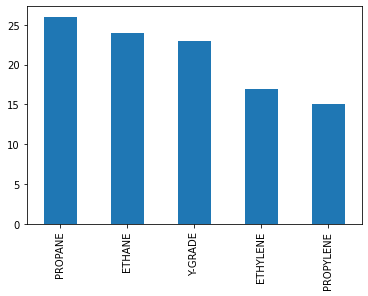

In [ ]:
# Sum liquid name unique values to see how many non-null values exist
# Show distribution of value counts

print(df['Liquid Name'].value_counts())
print('Sum of non-null values: ', str(df['Liquid Name'].value_counts().sum()))
df['Liquid Name'].value_counts().head().plot.bar();

In [ ]:
# Check if most of the null values in this column and other columns occur where the liquid type is "crude oil"

df_crude = df[df['Liquid Type']=='CRUDE OIL']
print('Sum of liquid name null values when liquid type is crude oil: ', df_crude['Liquid Name'].isna().sum())

Sum of liquid name null values when liquid type is crude oil:  1398


Most values from the liquid name feature are missing. Unsurprisingly, all crude oil samples are missing a liquid name.

**Liquid Ignition**

NO     2700
YES      95
Name: Liquid Ignition, dtype: int64
Sum of non-null values:  2795


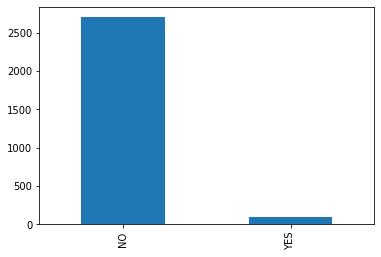

In [ ]:
# Sum liquid ignition unique values to see how many non-null values exist
# Show distribution of value counts

print(df['Liquid Ignition'].value_counts())
print('Sum of non-null values: ', str(df['Liquid Ignition'].value_counts().sum()))
df['Liquid Ignition'].value_counts().plot.bar();

In [ ]:
# Check the distribution of liquid types of samples where liquid ignition occurred 

df[df['Liquid Ignition']=='YES']['Liquid Type'].value_counts()

HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS            39
CRUDE OIL                                             33
REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LIQUID    23
Name: Liquid Type, dtype: int64

In [ ]:
# Check the distribution of liquid subtypes of samples where liquid ignition occurred 

df[df['Liquid Ignition']=='YES']['Liquid Subtype'].value_counts()

OTHER HVL                                                   20
LPG (LIQUEFIED PETROLEUM GAS) / NGL (NATURAL GAS LIQUID)    19
GASOLINE (NON-ETHANOL)                                      15
DIESEL, FUEL OIL, KEROSENE, JET FUEL                         5
MIXTURE OF REFINED PRODUCTS (TRANSMIX OR OTHER MIXTURE)      3
Name: Liquid Subtype, dtype: int64

In [ ]:
# Check the distribution of liquid names of samples where liquid ignition occurred 

df[df['Liquid Ignition']=='YES']['Liquid Name'].value_counts()

ETHYLENE                 3
ETHANE                   3
Y-GRADE                  3
PROPANE                  2
PROPYLENE                2
HP PROPYLENE             1
NATURAL GASOLINE         1
DEMETHANIZED RAW FEED    1
RESIDUAL VAPORS          1
ETHANE/PROPANE MIX       1
CONDENSATE               1
ETHANE/PROPANE           1
Name: Liquid Name, dtype: int64

**Liquid Explosion**

NO     2780
YES      15
Name: Liquid Explosion, dtype: int64
Sum of non-null values:  2795


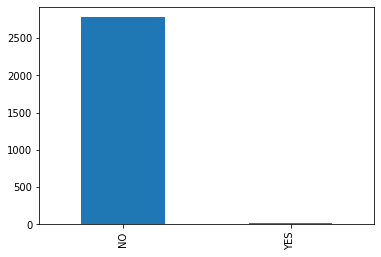

In [ ]:
# Sum liquid explosion unique values to see how many non-null values exist
# Show distribution of value counts

print(df['Liquid Explosion'].value_counts())
print('Sum of non-null values: ', str(df['Liquid Explosion'].value_counts().sum()))
df['Liquid Explosion'].value_counts().plot.bar();

In [ ]:
# Check the distribution of liquid types of samples where liquid ignition occurred

df[df['Liquid Explosion']=='YES']['Liquid Type'].value_counts()

HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS            11
CRUDE OIL                                              3
REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LIQUID     1
Name: Liquid Type, dtype: int64

In [ ]:
# Check the distribution of liquid subtypes of samples where liquid ignition occurred

df[df['Liquid Explosion']=='YES']['Liquid Subtype'].value_counts()

OTHER HVL                                                   7
LPG (LIQUEFIED PETROLEUM GAS) / NGL (NATURAL GAS LIQUID)    4
GASOLINE (NON-ETHANOL)                                      1
Name: Liquid Subtype, dtype: int64

In [ ]:
# Check the distribution of liquid names of samples where liquid ignition occurred

df[df['Liquid Explosion']=='YES']['Liquid Name'].value_counts()

ETHANE                3
ETHYLENE              1
ETHANE/PROPANE MIX    1
CONDENSATE            1
ETHANE/PROPANE        1
Name: Liquid Name, dtype: int64

## Conclusions so far

**Data insights**

- About half (1398/2795, or 50%) of pipeline accidents involved crude oil. The next most frequent type of oil was refined/petroleum product (34%), followed by high viscosity lubricant (HVL) or other types of flammable and toxic gas fluids. Carbon dioxide and biofuel/alternative fuels had the lowest proportions of accidents (1% and nearly 0%, respectively).
- Out of the available liquid subtypes, the most common subtype associated with accidents was diesel, fuel oil, jet fuel, and kerosene, followed by gasoline.
- Out of the available liquid names, the most common name associated with accidents was propane, followed by ethane.
- Most accidents did not involve liquid ignition (97%), as opposed to those that did (3%).
- Most accidents did not involve liquid explosion (99%), as opposed to those that did (1%).

**Physical and chemical properties most responsible for pipeline accidents**

- Crude oil appears to have caused far more accidents than any other type of liquid. However, this may simply be due to real-world scaling considerations, where crude oil may be the most commonly transported oil in pipelines, and therefore, it would make sense proportionally.
- For more refined oils, diesel, fuel oil, jet fuel, and kerosene have caused the most accidents. These are all petroleum-based oils, which contain a significant portion of crude oil ([source](https://www.epa.gov/emergency-response/types-refined-petroleum-products)).
- The overwhelming majority of accidents did not involve liquid ignition or explosion. However, for those that did, HVL and other toxic/flammable fluids caused the highest proportion of them, followed by crude oil. Most of these liquids consisted of low molecular weight hydrocarbons (i.e. ethane and propane derivatives).

**Potential physical/chemical regulations to reduce likelihood of pipeline accidents**

- High degrees of vigilance are required for transporting liquids containing crude oil via pipelines. 100% crude oil, as well as petroleum-containing oils, should be subject to stricter monitoring and surveillance along multiple checkpoints within the oil transportation pipeline.
- Liquid ignition and explosion, although relatively rare, imply accidents of greater severity and damage. By far, HVL and associated subtypes of oil were responsible for most liquid ignitions and explosions, and these liquids typically contain a high fraction of low-molecular weight compounds. Low-molecular weight compounds generally have a higher vapour pressure, which leads to more volatility and potential for ignitions and explosions ([source](https://link.springer.com/chapter/10.1007/978-1-4939-2565-0_18)). For this reason, it is crucially important to control the environmental conditions to minimize the risk of liquid ignitions and explosions. Introducing regulation to better control the external transportation environment for these liquids may reduce the likelihood of accidents.

## Finding similar groups in the dataset using K-modes clustering

Since there are many null values in certain columns in the dataset, I will use the following approach to address them:
- If there is no value for liquid subtype, use the same value as appears in the liquid type column
- If there is no value for liquid name, use the same value as appears in the liquid subtype column

Additionally, the data needs to be pre-processed prior to entering the algorithm:

- For columns with values with either "YES" or "NO", designate "NO" as 0, and "YES" as 1
- For all other columns, use one hot encoding

In [ ]:
# Install the kmodes library from PyPI

!pip install kmodes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Package imports

from sklearn.preprocessing import OneHotEncoder
from kmodes.kmodes import KModes

In [ ]:
# Omit the year column, as this is not needed for K-modes clustering

df_cluster = df.drop('Accident Year', axis=1)

In [ ]:
# Fill null values in liquid subtype column with liquid type
# Fill null values in liquid name column with liquid subtype
# Check that there are no remaining null values

df_cluster['Liquid Subtype'] = df_cluster['Liquid Subtype'].fillna(df_cluster['Liquid Type'])
df_cluster['Liquid Name'] = df_cluster['Liquid Name'].fillna(df_cluster['Liquid Subtype'])
df_cluster.isna().any()

Liquid Type         False
Liquid Subtype      False
Liquid Name         False
Liquid Ignition     False
Liquid Explosion    False
dtype: bool

In [ ]:
# Pre-process the data for K-modes clustering
# For columns that contain YES or NO, designate 0 as NO, and 1 as YES
# Since the dataset is not too large, and there are not too many unique values
# per feature, use one hot encoding to convert all categorical variables to numerical values

df_cluster['Liquid Ignition'] = df_cluster['Liquid Ignition'].replace({'NO': 0,
                                                                       'YES': 1})
df_cluster['Liquid Explosion'] = df_cluster['Liquid Explosion'].replace({'NO': 0,
                                                                         'YES': 1})
ohe = OneHotEncoder()
ohe_columns = ohe.fit_transform(df_cluster[['Liquid Type',
                                            'Liquid Subtype',
                                            'Liquid Name']])
ohe_columns_df = pd.DataFrame.sparse.from_spmatrix(ohe_columns, columns=ohe.get_feature_names_out())
df_encoded = pd.concat([ohe_columns_df, df_cluster[['Liquid Ignition', 'Liquid Explosion']]], axis=1)

In [ ]:
# Use K-modes clustering on the encoded dataset with 3 initial clusters

km = KModes(n_clusters=3, verbose=0)
clusters = km.fit_predict(df_encoded)

centroid_1 = pd.DataFrame([km.cluster_centroids_[0]], columns=df_encoded.columns)
centroid_2 = pd.DataFrame([km.cluster_centroids_[1]], columns=df_encoded.columns)
centroid_3 = pd.DataFrame([km.cluster_centroids_[2]], columns=df_encoded.columns)

In [ ]:
# Show centroid 1, dropping all columns where row value is 0

centroid_1.loc[:, (centroid_1 != 0).any(axis=0)]

,Liquid Type_CRUDE OIL,Liquid Subtype_CRUDE OIL,Liquid Name_CRUDE OIL
0,1.0,1.0,1.0


In [ ]:
# Show centroid 2, dropping all columns where row value is 0

centroid_2.loc[:, (centroid_2 != 0).any(axis=0)]

,"Liquid Type_REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LIQUID"
0,1.0


In [ ]:
# Show centroid 3, dropping all columns where row value is 0

centroid_3.loc[:, (centroid_3 != 0).any(axis=0)]

,"Liquid Type_HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS"
0,1.0


Looking at the above 3 clusters, they are grouped as the following:
1. Crude oil
2. Refined and/or petroleum product (non-HVL), liquid
3. HVL or other flammable or toxic liquid, gas

Unsurprisingly, these are also the most frequently occurring liquid types in the dataset. These clusters are not particularly useful, as the frequencies of these liquid types have already been shown in the above dataset exploration section.

Since the dataset containing the chemical/physical properties does not have many features (and in this case, most of the columns from the encoded DataFrame come from one-hot encoding), it may not make sense to significantly increase the number of clusters to better group features. However, I will re-try K-modes clustering with 5 clusters.

In [ ]:
# Use K-modes clustering on the encoded dataset with 5 clusters

km = KModes(n_clusters=5, verbose=0)
clusters = km.fit_predict(df_encoded)

centroid_1 = pd.DataFrame([km.cluster_centroids_[0]], columns=df_encoded.columns)
centroid_2 = pd.DataFrame([km.cluster_centroids_[1]], columns=df_encoded.columns)
centroid_3 = pd.DataFrame([km.cluster_centroids_[2]], columns=df_encoded.columns)
centroid_4 = pd.DataFrame([km.cluster_centroids_[3]], columns=df_encoded.columns)
centroid_5 = pd.DataFrame([km.cluster_centroids_[4]], columns=df_encoded.columns)

In [ ]:
centroid_1.loc[:, (centroid_1 != 0).any(axis=0)]

,Liquid Type_CRUDE OIL,Liquid Subtype_CRUDE OIL,Liquid Name_CRUDE OIL
0,1.0,1.0,1.0


In [ ]:
centroid_2.loc[:, (centroid_2 != 0).any(axis=0)]

,"Liquid Type_REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LIQUID",Liquid Subtype_GASOLINE (NON-ETHANOL),Liquid Name_GASOLINE (NON-ETHANOL)
0,1.0,1.0,1.0


In [ ]:
centroid_3.loc[:, (centroid_3 != 0).any(axis=0)]

,"Liquid Type_HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS"
0,1.0


In [ ]:
centroid_4.loc[:, (centroid_4 != 0).any(axis=0)]

,"Liquid Type_REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LIQUID","Liquid Subtype_DIESEL, FUEL OIL, KEROSENE, JET FUEL","Liquid Name_DIESEL, FUEL OIL, KEROSENE, JET FUEL"
0,1.0,1.0,1.0


In [ ]:
centroid_5.loc[:, (centroid_5 != 0).any(axis=0)]

,Liquid Type_CO2 (CARBON DIOXIDE),Liquid Subtype_CO2 (CARBON DIOXIDE),Liquid Name_CO2 (CARBON DIOXIDE)
0,1.0,1.0,1.0


Using K-modes clustering with 5 clusters generates more helpful insights for this dataset, as it shows that the 5 most similar groups in this dataset are:

1. Crude oil
2. Refined and/or petroleum product (non-HVL), and more specifically gasoline (non-ethanol)
3. HVL or other flammable or toxic fluids
4. Refined and/or petroleum product (non-HVL), and more specifically diesel, fuel oil, kerosene, and jet fuel
5. Carbon dioxide

Since carbon dioxide was not a relatively infrequent liquid type in this dataset (38/2795), it makes sense to keep the number of clusters at 5.

## Have the existing regulations been reducing the number of pipeline accidents on a yearly basis?

Finally, I will look at the number of pipeline accidents reported in each year present in the dataset, to determine whether existing regulations on the properties of pipeline-transported oil have seemingly been effective or not.

2010    350
2011    345
2012    366
2013    401
2014    454
2015    462
2016    415
2017      2
Name: Accident Year, dtype: int64
Sum of non-null values:  2795


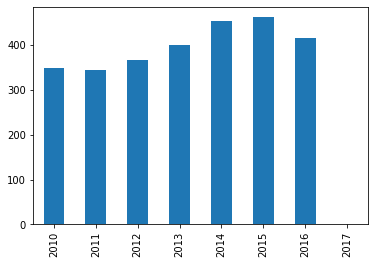

In [ ]:
print(df['Accident Year'].value_counts().sort_index())
print('Sum of non-null values: ', str(df['Accident Year'].value_counts().sum()))
df['Accident Year'].value_counts().sort_index().plot.bar();

## Conclusion

Of the 6 years' of data in the dataset, at first, it would not appear that government regulations have been effecive in reducing pipeline accidents. However, this can not be conclusively stated without considering other factors, such as:
- How frequently pipelines are being used
- The volumes of specific types of oil being transported, on average
- Whether the logistics of transportation have been changing in that time (e.g. distance travelled)
- Environmental conditions and fluctuations over time (e.g. temperature, atmospheric pressure, etc)